In [1]:
import ROOT
from ROOT import TFile, gDirectory
from ROOT import TH1D, TCanvas, TH2D, TH2F
import math

Welcome to JupyROOT 6.22/02


In [2]:
#Arquivo onde contém os dados
f = TFile('experiment.root')
mychain = gDirectory.Get('tree1')
entries = mychain.GetEntries()

In [3]:
###Arquivo onde esta sendo salvo os histogramas

fsave = TFile('histograms_py.root','RECREATE')

<h1>Exercício 1

- Revise the script to draw the chi2 histogram with error bars.

In [4]:
### The Set-up code goes here.

#chi2 histogram
chi2Hist = TH1D("chi2","Histogram of Chi2", 100, 0, 2.)
chi2Hist.GetXaxis().SetTitle("chi2")
chi2Hist.GetYaxis().SetTitle("Number of Events")

In [5]:
### The Loop code goes here.

for jentry in range(entries):
    nb = mychain.GetEntry( jentry )
    chi2 = mychain.chi2
    chi2Hist.Fill(chi2)
    if nb <= 0:
        continue

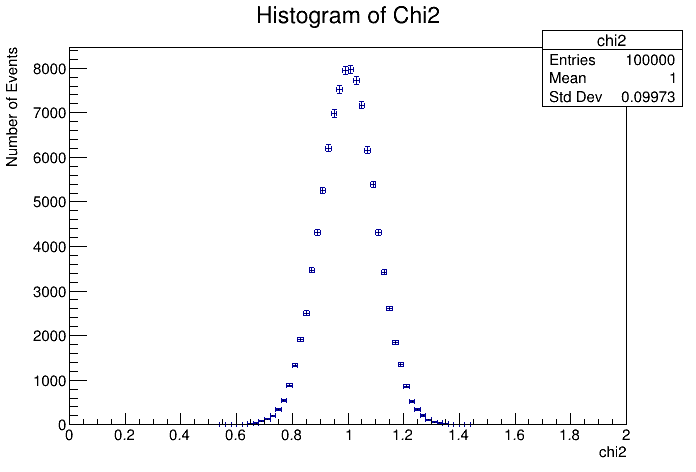

In [6]:
### The Wrap-up code goes here

canvas = TCanvas()
chi2Hist.Draw("E1")
canvas.Draw()

<h1> Exercício 2 e 3
    

- Revise the scrip to create, fille and display an additional histogram of the variable ebeam(with error bars and axis labels).
- Fit the ebeamhistogram to a gaussian distribution.

In [7]:
#ebeam histogram
ebeamHist = TH1D("ebeam","Histogram of ebeam",100,149.0,151.0)
ebeamHist.GetXaxis().SetTitle("ebeam (GeV)")
ebeamHist.GetYaxis().SetTitle("Number of Events")

In [8]:
for jentry in range( entries ):
    nb = mychain.GetEntry( jentry )
    ebeam = mychain.ebeam
    ebeamHist.Fill(ebeam)
    if nb <= 0:
        continue

 FCN=71.0795 FROM MIGRAD    STATUS=CONVERGED      62 CALLS          63 TOTAL
                     EDM=4.98532e-10    STRATEGY= 1      ERROR MATRIX ACCURATE 
  EXT PARAMETER                                   STEP         FIRST   
  NO.   NAME      VALUE            ERROR          SIZE      DERIVATIVE 
   1  Constant     5.32687e+03   2.06188e+01   6.98547e-02  -1.63547e-06
   2  Mean         1.49999e+02   4.73759e-04   7.15253e-05   4.81175e-03
   3  Sigma        1.49688e-01   3.34201e-04   2.51907e-06  -4.66426e-02


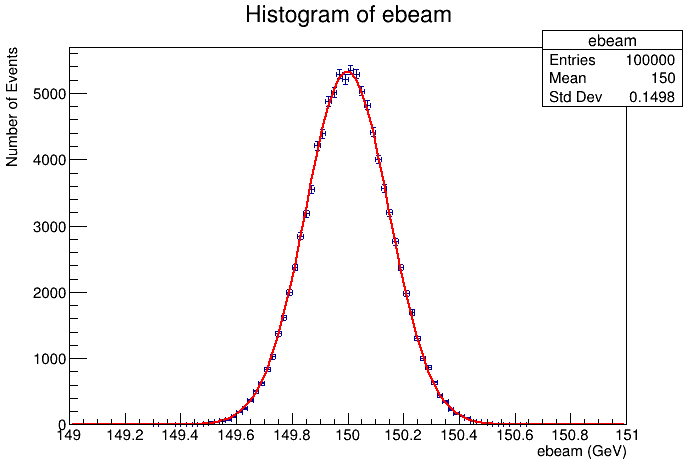

In [9]:
canvas = TCanvas()
ebeamHist.Fit("gaus")
ebeamHist.Draw("E1")
canvas.Draw()

<h1> Exercício 4

- Add another plot: a scatter plot of chi2versus ebeam. Don't forget to label the axes!

In [10]:
#Scatterplot chi2 x ebeam
scatter = TH2F("Scatter","Scatterplot chi2 x ebeam",100,149.0,151.0,100,0,2)
scatter.GetXaxis().SetTitle("ebeam")
scatter.GetYaxis().SetTitle("chi2")

In [11]:
for jentry in range( entries ):
    ientry = mychain.LoadTree( jentry )
    chi2 = mychain.chi2
    ebeam = mychain.ebeam
    scatter.Fill(ebeam,chi2)     
    nb = mychain.GetEntry( jentry )
    if nb <= 0:
        continue 

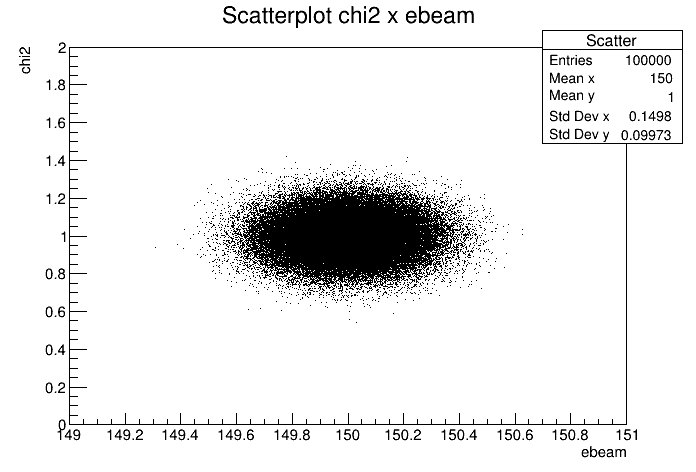

In [12]:
canvas = TCanvas()
scatter.Draw()
canvas.Draw()

<h1> Exercício 5

- Calculate pt = sqrt(px*px + py*py) in an analysis macro and make a histogram of the variable.

In [13]:
## pt Histogram

ptHist = TH1D("pt","Histogram of pt",100,149.0,35)
ptHist.GetXaxis().SetTitle("pt (GeV)")
ptHist.GetYaxis().SetTitle("Number of Events")

In [14]:
for jentry in range( entries ):
    ientry = mychain.LoadTree( jentry )
    px = mychain.px
    py = mychain.py
    pt = math.sqrt(px*px + py*py)     
    ptHist.Fill(pt)
    nb = mychain.GetEntry( jentry )
    if nb <= 0:
        continue

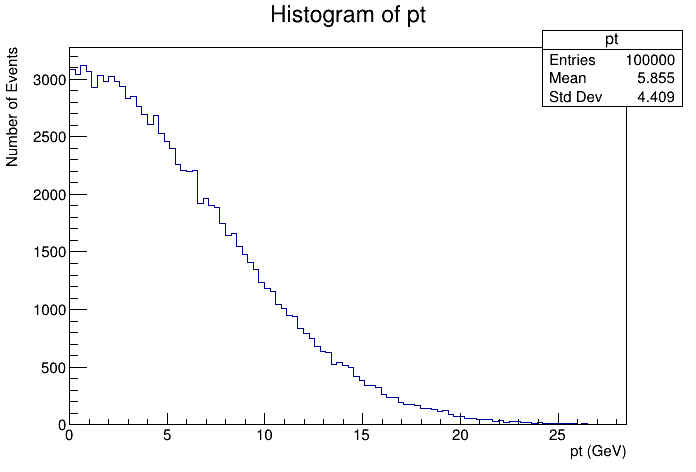

In [15]:
canvas = TCanvas()
ptHist.Draw()
canvas.Draw()

<h1> Exercício 6

- Include a histogram of the quantity theta, or the angle that the beam makes with the z-axis. theta = arctg(pt/pz)

In [16]:
## theta Histogram

thetaHist = TH1D("theta","Histogram of theta",100,0,0.2)
thetaHist.GetXaxis().SetTitle("theta")
thetaHist.GetYaxis().SetTitle("Number of Events")

In [17]:
for jentry in range( entries ):
    ientry = mychain.LoadTree( jentry )
    pz = mychain.pz
    px = mychain.px
    py = mychain.py
    pt = math.sqrt(px*px + py*py)   
    theta = ROOT.TMath.ATan(pt/pz)
    thetaHist.Fill(theta)
    nb = mychain.GetEntry( jentry )
    if nb <= 0:
        continue

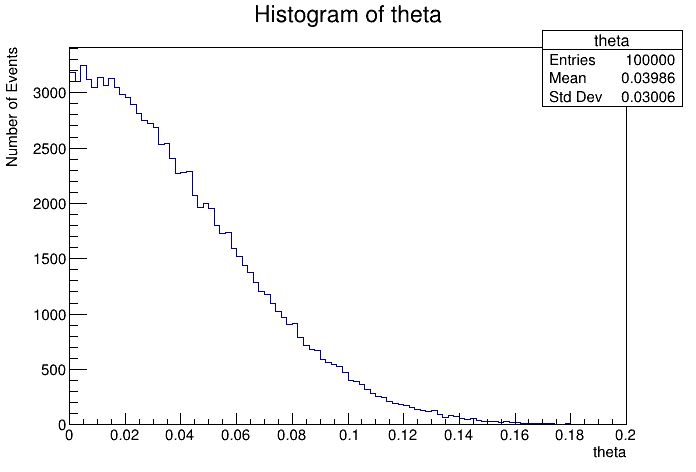

In [18]:
canvas = TCanvas()
thetaHist.Draw()
canvas.Draw()

<h1> Exercício 7

- Apply a cut in your analysis macro. Your goal is to count the number of events for which pz is less than 145 GeV, and then display the value. Tip: include the following statement in your wrap-up section: print "The number of events with pz < 145 is", pzCount

In [19]:
## pz < 145 Histogram

pzHist = TH1D("pz","Histogram of pz < 145 GeV",100,130,150)
pzHist.GetXaxis().SetTitle("pz < 145 GeV")
pzHist.GetYaxis().SetTitle("Number of Events")

In [20]:
cont = 0
for jentry in range( entries ):
    ientry = mychain.LoadTree( jentry )
    pz = mychain.pz
    if(pz < 145):
        cont = cont + 1
        pzHist.Fill(pz)
    nb = mychain.GetEntry( jentry )
    if nb <= 0:
        continue
    

O número de eventos com pz < 145 GeV é:  14962


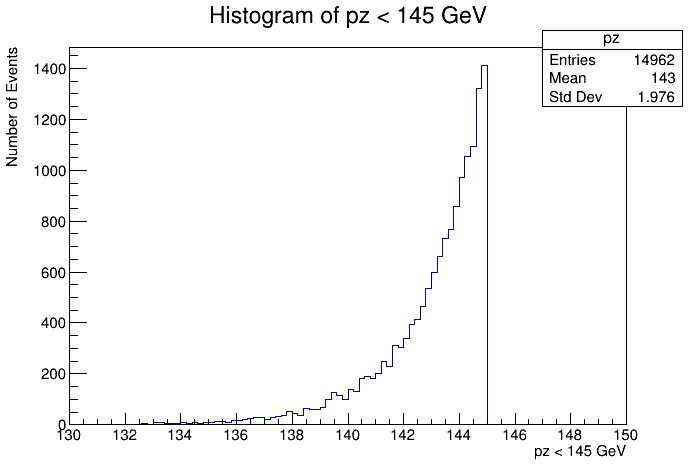

In [21]:
print("O número de eventos com pz < 145 GeV é: ", cont)
canvas = TCanvas()
pzHist.Draw()
canvas.Draw()

<h1> Exercício 8

In [22]:
chi2Hist.Write()
ebeamHist.Write()
scatter.Write()
ptHist.Write()
thetaHist.Write()
pzHist.Write()
fsave.Write()

9641